# Some visualizations of gradient boosting

In [13]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.tree import DecisionTreeRegressor

In [103]:
npts = 100
xlim = (0, 10)
x = stats.uniform(xlim[0], xlim[1]-xlim[0]).rvs(npts)
y = np.sin(x) + stats.norm(0,0.3).rvs(npts)

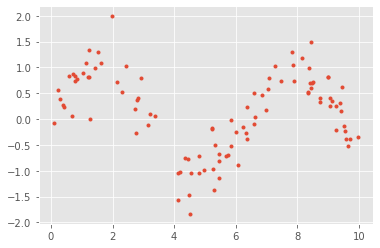

In [104]:
fig, ax = plt.subplots()
ax.plot(x, y, '.')

In [110]:
n_estimators = 16
learning_rate = 0.20
estimators = []
predictions = np.zeros((len(x), n_estimators+1))
predictions[:, 0] = np.mean(y)
for i in range(n_estimators):
    residuals = y - predictions[:, i]
    model = DecisionTreeRegressor(max_depth=2)
    model.fit(x[:, None], residuals)
    estimators.append(model)
    predictions[:, i+1] = predictions[:, i] + learning_rate * model.predict(x[:, None])

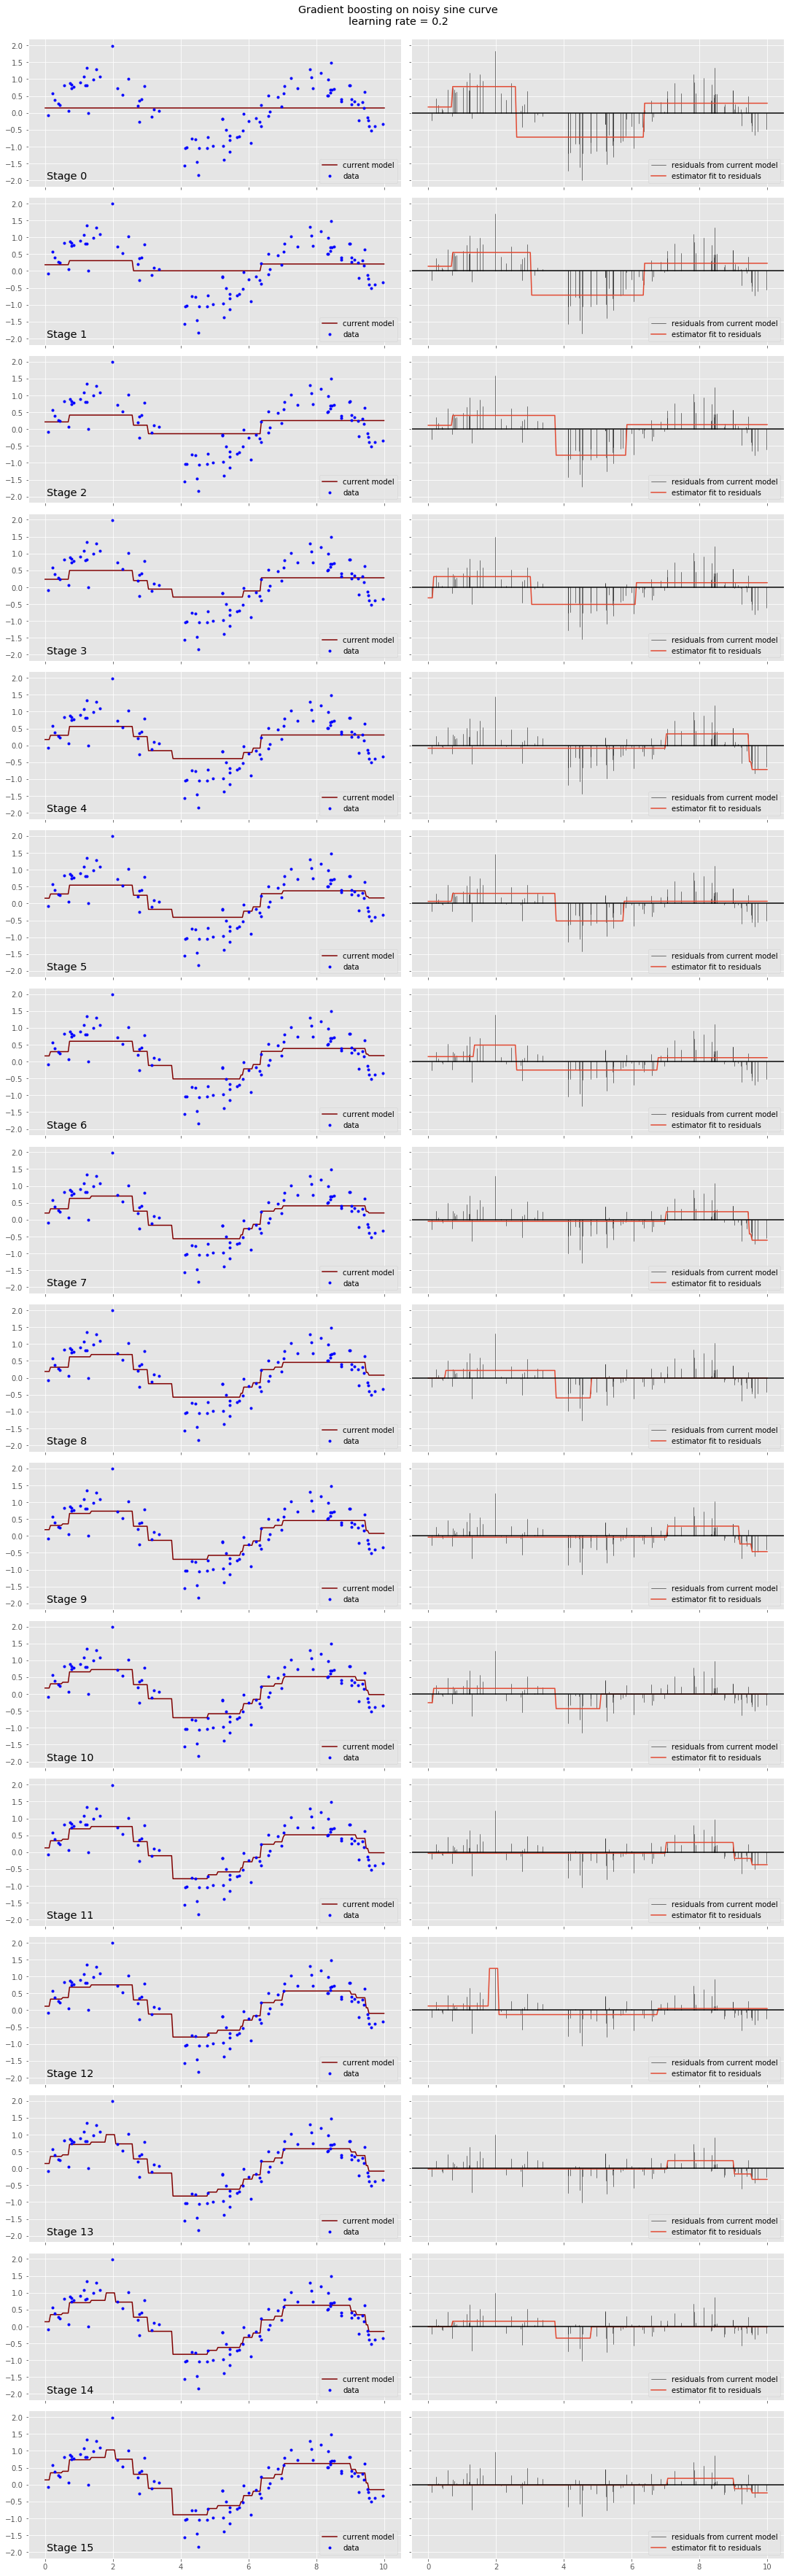

In [111]:
fig, axs = plt.subplots(n_estimators, 2, figsize=(15,50), sharex=True, sharey=True)

all_npts = 250
xpts = np.linspace(*xlim, all_npts)
all_predictions = np.zeros((all_npts, n_estimators+1))
all_predictions[:, 0] = np.mean(y)
for i, (ax, model) in enumerate(zip(axs, estimators)):
    all_predictions[:, i+1] = all_predictions[:, i] + learning_rate * model.predict(xpts[:, None])
    ax[0].plot(xpts, all_predictions[:, i], label='current model', color='maroon')
    ax[0].plot(x, y, '.', label='data', color='b')
    for j in range(len(x)):
        ax[1].plot([x[j], x[j]],
                   [0, y[j] - predictions[j, i]],
                   lw=0.5,
                   color='k',
                   label='residuals from current model' if j==0 else '')
    #ax[1].plot(x, y - predictions[:, i], '.')
    ax[1].plot(xpts, estimators[i].predict(xpts[:, None]), label='estimator fit to residuals')
    ax[1].axhline(0, color='k')
    ax[0].legend(loc="lower right")
    ax[1].legend(loc="lower right")
    ax[0].text(0.05, 0.05, f'Stage {i}', size='x-large', transform=ax[0].transAxes)

fig.suptitle(f'Gradient boosting on noisy sine curve\nlearning rate = {learning_rate}', size='x-large')
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("gb.png")